<a href="https://colab.research.google.com/github/SasukeUchiha7/rumor-detection/blob/main/Rumor_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Packages**

In [2]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
from sklearn import metrics
from sklearn.metrics import confusion_matrix
%matplotlib inline
import seaborn as sns

import numpy as np # linear algebra
import pandas as pd #data processing

import os
import re
import nltk

**Reading Dataset**

In [36]:
train=pd.read_csv('./dataset/train.csv')
test=pd.read_csv('./dataset/test.csv')

In [ ]:
# train.head()

In [10]:
# print(train.shape, test.shape)

(20800, 5) (5200, 4)


In [4]:
print(train.isnull().sum())
print('************')
print(test.isnull().sum())

id           0
title      558
author    1957
text        39
label        0
dtype: int64
************
id          0
title     122
author    503
text        7
dtype: int64


**Concating all columns in one**

In [37]:
test=test.fillna(' ')
train=train.fillna(' ')
test['total']=test['title']+' '+test['author']+test['text']
train['total']=train['title']+' '+train['author']+train['text']

In [13]:
# train['total'][0]

'House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It Darrell LucusHouse Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It By Darrell Lucus on October 30, 2016 Subscribe Jason Chaffetz on the stump in American Fork, Utah ( image courtesy Michael Jolley, available under a Creative Commons-BY license) \nWith apologies to Keith Olbermann, there is no doubt who the Worst Person in The World is this week–FBI Director James Comey. But according to a House Democratic aide, it looks like we also know who the second-worst person is as well. It turns out that when Comey sent his now-infamous letter announcing that the FBI was looking into emails that may be related to Hillary Clinton’s email server, the ranking Democrats on the relevant committees didn’t hear about it from Comey. They found out via a tweet from one of the Republican committee chairmen. \nAs we now know, Comey notified the Republican chairmen and Democratic ranking members of

In [29]:
# real_words = ''
# fake_words = ''
# stopwords = set(STOPWORDS) 
  
# # iterate through the csv file 
# for val in train[train['label']==1].total: 
  
#     # split the value 
#     tokens = val.split() 
      
#     # Converts each token into lowercase 
#     for i in range(len(tokens)): 
#         tokens[i] = tokens[i].lower() 
      
#     real_words += " ".join(tokens)+" "

# for val in train[train['label']==0].total: 
      
#     # split the value 
#     tokens = val.split() 
      
#     # Converts each token into lowercase 
#     for i in range(len(tokens)): 
#         tokens[i] = tokens[i].lower() 
      
#     fake_words += " ".join(tokens)+" "

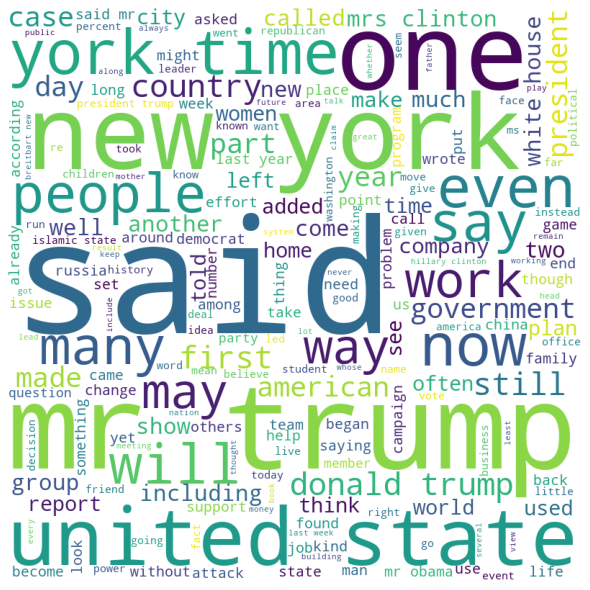

In [17]:
# wordcloud = WordCloud(width = 800, height = 800, 
#                 background_color ='white', 
#                 stopwords = stopwords, 
#                 min_font_size = 10).generate(fake_words) 
  
# # plot the WordCloud image                        
# plt.figure(figsize = (8, 8), facecolor = None) 
# plt.imshow(wordcloud) 
# plt.axis("off") 
# plt.tight_layout(pad = 0) 
  
# plt.show() 

In [18]:
# #Remove punctuations from the String  
# s = "!</> hello please$$ </>^s!!!u%%bs&&%$cri@@@be^^^&&!& </>*to@# the&&\ cha@@@n##%^^&nel!@# %%$"

In [19]:
# s = re.sub(r'[^\w\s]','',s)

In [20]:
# print(s)

 hello please subscribe to the channel 


**Importing nltk modules for tokenizing**

In [38]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [27]:
# nltk.word_tokenize("Hello how are you")

['Hello', 'how', 'are', 'you']

In [39]:
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [40]:
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()

input_str="been had done languages cities mice"

In [9]:
# input_str = nltk.word_tokenize(input_str)

# for word in input_str:
#     print(lemmatizer.lemmatize(word))

been
had
done
language
city
mouse


**Cleaning the input**

In [41]:
lemmatizer=WordNetLemmatizer()
for index,row in train.iterrows():
    filter_sentence = ''
    
    sentence = row['total']
    sentence = re.sub(r'[^\w\s]','',sentence) #cleaning
    
    words = nltk.word_tokenize(sentence) #tokenization
    
    words = [w for w in words if not w in stop_words]  #stopwords removal
    
    for word in words:
        filter_sentence = filter_sentence + ' ' + str(lemmatizer.lemmatize(word)).lower()
        
    train.loc[index,'total'] = filter_sentence

In [11]:
# train['total'][0]

' house dem aide we didnt even see comeys letter until jason chaffetz tweeted it darrell lucushouse dem aide we didnt even see comeys letter until jason chaffetz tweeted it by darrell lucus october 30 2016 subscribe jason chaffetz stump american fork utah image courtesy michael jolley available creative commonsby license with apology keith olbermann doubt worst person the world weekfbi director james comey but according house democratic aide look like also know secondworst person well it turn comey sent nowinfamous letter announcing fbi looking email may related hillary clintons email server ranking democrats relevant committee didnt hear comey they found via tweet one republican committee chairman as know comey notified republican chairman democratic ranking member house intelligence judiciary oversight committee agency reviewing email recently discovered order see contained classified information not long letter went oversight committee chairman jason chaffetz set political world abl

In [43]:
# train['text'][0]

'House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It By Darrell Lucus on October 30, 2016 Subscribe Jason Chaffetz on the stump in American Fork, Utah ( image courtesy Michael Jolley, available under a Creative Commons-BY license) \nWith apologies to Keith Olbermann, there is no doubt who the Worst Person in The World is this week–FBI Director James Comey. But according to a House Democratic aide, it looks like we also know who the second-worst person is as well. It turns out that when Comey sent his now-infamous letter announcing that the FBI was looking into emails that may be related to Hillary Clinton’s email server, the ranking Democrats on the relevant committees didn’t hear about it from Comey. They found out via a tweet from one of the Republican committee chairmen. \nAs we now know, Comey notified the Republican chairmen and Democratic ranking members of the House Intelligence, Judiciary, and Oversight committees that his agency was reviewing emai

In [42]:
train = train[['total','label']]

**Importing NLP modules**

In [13]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [43]:
X_Train = train['total'] #for pipelining
Y_Train = train['label'] #for pipelining
X_train = train['total']
Y_train = train['label']

In [15]:
# corpus = [
#     'This is the first document second.',
#     'This document is the second document.',
#     'And this is the third one.',
#     'Is this the first document?',
# ]
# vectorizer = CountVectorizer()
# X = vectorizer.fit_transform(corpus)
# print(vectorizer.get_feature_names())

['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']


In [16]:
# print(X.toarray())

[[0 1 1 1 0 1 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]


In [17]:
# def vectorize_text(features, max_features):
#     vectorizer = TfidfVectorizer( stop_words='english',
#                             decode_error='strict',
#                             analyzer='word',
#                             ngram_range=(1, 2),
#                             max_features=max_features
#                             #max_df=0.5 # Verwendet im ML-Kurs unter Preprocessing                   
#                             )
#     feature_vec = vectorizer.fit_transform(features)
#     print(vectorizer.get_feature_names())
#     return feature_vec.toarray()

In [18]:
# tfidf_features = vectorize_text(['hello how are you doing','hi i am doing fine'],30)


['doing', 'doing fine', 'fine', 'hello', 'hello doing', 'hi', 'hi doing']


In [19]:
# tfidf_features

array([[0.44943642, 0.        , 0.        , 0.6316672 , 0.6316672 ,
        0.        , 0.        ],
       [0.33517574, 0.47107781, 0.47107781, 0.        , 0.        ,
        0.47107781, 0.47107781]])

In [20]:
#Feature extraction using count vectorization and tfidf.
count_vectorizer = CountVectorizer()
count_vectorizer.fit_transform(X_train)
freq_term_matrix = count_vectorizer.transform(X_train)
tfidf = TfidfTransformer(norm="l2")
tfidf.fit(freq_term_matrix)
tf_idf_matrix = tfidf.fit_transform(freq_term_matrix)

In [27]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in iter.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [22]:
test_counts = count_vectorizer.transform(test['total'].values)
test_tfidf = tfidf.transform(test_counts)

#split in samples
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tf_idf_matrix, Y_train, random_state=0)

In [23]:
print(X_train.shape,X_test.shape)

(15600, 220387) (5200, 220387)


In [24]:
from sklearn.linear_model import LogisticRegression

**Applying the models**

1. Logistic Regression

In [28]:
logreg = LogisticRegression(C=1e5)
logreg.fit(X_train, y_train)
pred = logreg.predict(X_test)
print('Accuracy of Logistic classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))
from sklearn.naive_bayes import MultinomialNB
cm = confusion_matrix(y_test, pred)
cm

Accuracy of Logistic classifier on training set: 1.00
Accuracy of Logistic classifier on test set: 0.98


array([[2493,   71],
       [  44, 2592]])

2. MultinomialNB

In [29]:
from sklearn.naive_bayes import MultinomialNB

NB = MultinomialNB()
NB.fit(X_train, y_train)
pred = NB.predict(X_test)
print('Accuracy of NB  classifier on training set: {:.2f}'
     .format(NB.score(X_train, y_train)))
print('Accuracy of NB classifier on test set: {:.2f}'
     .format(NB.score(X_test, y_test)))
cm = confusion_matrix(y_test, pred)
cm

Accuracy of NB  classifier on training set: 0.88
Accuracy of NB classifier on test set: 0.83


array([[2558,    6],
       [ 853, 1783]])

**Pipelining**

In [45]:
from sklearn.pipeline import Pipeline
import joblib
from sklearn import linear_model

In [46]:
pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer(norm='l2')),
    ('clf', linear_model.LogisticRegression(C=1e5)),
])

In [44]:
X_Train[0]

' house dem aide we didnt even see comeys letter until jason chaffetz tweeted it darrell lucushouse dem aide we didnt even see comeys letter until jason chaffetz tweeted it by darrell lucus october 30 2016 subscribe jason chaffetz stump american fork utah image courtesy michael jolley available creative commonsby license with apology keith olbermann doubt worst person the world weekfbi director james comey but according house democratic aide look like also know secondworst person well it turn comey sent nowinfamous letter announcing fbi looking email may related hillary clintons email server ranking democrats relevant committee didnt hear comey they found via tweet one republican committee chairman as know comey notified republican chairman democratic ranking member house intelligence judiciary oversight committee agency reviewing email recently discovered order see contained classified information not long letter went oversight committee chairman jason chaffetz set political world abl

In [47]:
pipeline.fit(X_Train, Y_Train)

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=Non...
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('clf',
                 LogisticRegression(C=100000.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1

In [49]:
pipeline.predict([" house dem aide we didnt even see comeys letter until jason chaffetz tweeted it darrell lucushouse dem aide we didnt even see comeys letter until jason chaffetz tweeted it by darrell lucus october 30 2016 subscribe jason chaffetz stump american fork utah image courtesy michael jolley available creative commonsby license with apology keith olbermann doubt worst person the world weekfbi director james comey but according house democratic aide look like also know secondworst person well it turn comey sent nowinfamous letter announcing fbi looking email may related hillary clintons email server ranking democrats relevant committee didnt hear comey they found via tweet one republican committee chairman as know comey notified republican chairman democratic ranking member house intelligence judiciary oversight committee agency reviewing email recently discovered order see contained classified information not long letter went oversight committee chairman jason chaffetz set political world ablaze tweet fbi dir informed the fbi learned existence email appear pertinent investigation case reopened jason chaffetz jasoninthehouse october 28 2016 of course know case comey actually saying reviewing email light unrelated casewhich know anthony weiners sexting teenager but apparently little thing fact didnt matter chaffetz the utah republican already vowed initiate raft investigation hillary winsat least two year worth possibly entire term worth apparently chaffetz thought fbi already work himresulting tweet briefly roiled nation cooler head realized dud but according senior house democratic aide misreading letter may least chaffetz sin that aide told shareblue bos democrats didnt even know comeys letter timeand found checked twitter democratic ranking members relevant committee didnt receive comeys letter republican chairmen in fact democratic ranking members receive chairman oversight government reform committee jason chaffetz tweeted made public so let see weve got right the fbi director tell chaffetz gop committee chairman major development potentially politically explosive investigation neither chaffetz colleague courtesy let democratic counterpart know instead according aide made find twitter there already talk daily kos comey provided advance notice letter chaffetz republicans giving time turn spin machine that may make good theater nothing far even suggests case after nothing far suggests comey anything grossly incompetent tonedeaf what suggest however chaffetz acting way make dan burton darrell issa look like model responsibility bipartisanship he didnt even decency notify ranking member elijah cummings something explosive if doesnt trample basic standard fairness i dont know granted likely chaffetz answer he sits ridiculously republican district anchored provo orem cook partisan voting index r25 gave mitt romney punishing 78 percent vote 2012 moreover republican house leadership given full support chaffetz planned fishing expedition but doesnt mean cant turn hot light after textbook example house become republican control and also second worst person world about darrell lucus darrell 30something graduate university north carolina considers journalist old school an attempt turn member religious right college succeeded turning religious right worst nightmarea charismatic christian unapologetic liberal his desire stand scared silence increased survived abusive threeyear marriage you may know daily kos christian dem nc follow twitter darrelllucus connect facebook click buy darrell mello yello connect"])

array([1])

**Saving pipeline for deployment**

In [50]:
filename = 'pipeline.sav'
joblib.dump(pipeline, filename)

['pipeline.sav']

In [52]:
rumor_model = './pipeline.sav'

In [53]:
loaded_model = joblib.load(rumor_model)

In [54]:
result = loaded_model.predict(["flynn hillary clinton big woman campus breitbart daniel j flynnever get feeling life circle roundabout rather head straight line toward intended destination hillary clinton remains big woman campus leafy liberal wellesley massachusetts everywhere else vote likely inauguration dress remainder day way miss havisham forever wore wedding dress speaking great expectations hillary rodham overflowed 48 year ago first addressed wellesley graduating class the president college informed gathered 1969 student needed debate far i could ascertain spokesman kind like democratic primary 2016 minus term unknown even seven sisters school i glad miss adams made clear i speaking today u 400 u miss rodham told classmate after appointing edger bergen charlie mccarthys mortimer snerds attendance bespectacled granny glass awarding matronly wisdom least john lennon wisdom took issue previous speaker despite becoming first win election seat u s senate since reconstruction edward brooke came criticism calling empathy goal protestors criticized tactic though clinton senior thesis saul alinsky lamented black power demagogue elitist arrogance repressive intolerance within new left similar word coming republican necessitated brief rebuttal trust rodham ironically observed 1969 one word i asked class rehearsal wanted say everyone came said talk trust talk lack trust u way feel others talk trust bust what say what say feeling permeates generation perhaps even understood distrusted the trust bust certainly busted clintons 2016 plan she certainly even understand people distrusted after whitewater travelgate vast conspiracy benghazi missing email clinton found distrusted voice friday there load compromising road broadening political horizon and distrust american people trump edged 48 percent 38 percent question immediately prior novembers election stood major reason closing horizon clinton described vanquisher supporter embracing lie con alternative fact assault truth reason she failed explain american people chose lie truth as history major among today know well people power invent fact attack question mark beginning end free society offered that hyperbole like many people emerge 1960s hillary clinton embarked upon long strange trip from high school goldwater girl wellesley college republican president democratic politician clinton drank time place gave degree more significantly went idealist cynic comparison two wellesley commencement address show way back lamented long leader viewed politics art possible challenge practice politics art making appears impossible possible now big woman campus odd woman white house wonder current station even possible why arent i 50 point ahead asked september in may asks isnt president the woman famously dubbed congenital liar bill safire concludes lie mind getting stood election day like finding jilted bride wedding day inspires dangerous delusion"])
print(result)

[0]
